<a href="https://colab.research.google.com/github/Promilasharan/Predicting-Binding-Affinity-of-Drug-Compounds-for-BACE1/blob/main/Chemical_space_analysis_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 29.3 MB/s eta 0:00:00


In [2]:
import pandas as pd

## **Load bioactivity data**

In [3]:
df = pd.read_csv('BACE_03_bioactivity_data_curated.csv')
df


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate
...,...,...,...,...
7348,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,775.0,active
7349,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,1031.0,intermediate
7350,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,828.0,active
7351,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,15.1,active


## **Calculate Lipinski descriptors**

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

### **Import libraries**

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [5]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors


In [6]:

df_lipinski = lipinski(df.canonical_smiles)


###**Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [7]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,999.085,-1.4355,13.0,13.0
1,893.005,-1.7361,12.0,12.0
2,751.988,2.3535,8.0,9.0
3,737.895,1.9626,8.0,8.0
4,828.020,3.5739,8.0,8.0
...,...,...,...,...
7348,1057.256,2.4833,7.0,13.0
7349,3036.578,2.0591,26.0,43.0
7350,3052.577,1.7647,27.0,44.0
7351,377.485,3.3450,3.0,5.0


In [8]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate
...,...,...,...,...
7348,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,775.0,active
7349,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,1031.0,intermediate
7350,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,828.0,active
7351,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,15.1,active


Now, let's combine the 2 DataFrame

In [9]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [10]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active,999.085,-1.4355,13.0,13.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active,893.005,-1.7361,12.0,12.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active,751.988,2.3535,8.0,9.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate,737.895,1.9626,8.0,8.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate,828.020,3.5739,8.0,8.0
...,...,...,...,...,...,...,...,...
7348,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,775.0,active,1057.256,2.4833,7.0,13.0
7349,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,1031.0,intermediate,3036.578,2.0591,26.0,43.0
7350,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,828.0,active,3052.577,1.7647,27.0,44.0
7351,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,15.1,active,377.485,3.3450,3.0,5.0


### **Convert IC50 to pIC50**

To allow IC50 data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:

- Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
- Take the molar value and apply -log10
- Delete the standard_value column and create a new pIC50 column

In [11]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x


**Point to note:** Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [12]:
-np.log10( (10**-9)* 100000000 )

1.0

In [13]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [14]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [15]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-14-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5600.0
...,...,...,...,...,...,...,...,...
7348,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,active,1057.256,2.4833,7.0,13.0,775.0
7349,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,intermediate,3036.578,2.0591,26.0,43.0,1031.0
7350,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,active,3052.577,1.7647,27.0,44.0,828.0
7351,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,active,377.485,3.3450,3.0,5.0,15.1


In [16]:
df_combined.standard_value.describe()


count    7.353000e+03
mean     4.292130e+04
std      1.105715e+06
min      2.000000e-04
25%      2.850000e+01
50%      2.590000e+02
75%      3.300000e+03
max      8.600000e+07
Name: standard_value, dtype: float64

In [17]:
df_norm.standard_value_norm.describe()

count    7.353000e+03
mean     4.292130e+04
std      1.105715e+06
min      2.000000e-04
25%      2.850000e+01
50%      2.590000e+02
75%      3.300000e+03
max      8.600000e+07
Name: standard_value_norm, dtype: float64

In [18]:
df_final = pIC50(df_norm)
df_final

<ipython-input-11-62152670485b>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...
7348,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,active,1057.256,2.4833,7.0,13.0,6.110698
7349,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,intermediate,3036.578,2.0591,26.0,43.0,5.986741
7350,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,active,3052.577,1.7647,27.0,44.0,6.081970
7351,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,active,377.485,3.3450,3.0,5.0,7.821023


In [19]:
df_final.pIC50.describe()


count    7353.000000
mean        6.483156
std         1.399607
min         1.065502
25%         5.481486
50%         6.586700
75%         7.545155
max        12.698970
Name: pIC50, dtype: float64

###**Removing the 'intermediate' bioactivity class**

Here, we will be removing the intermediate class from our data set.

In [20]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
5,CHEMBL116826,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,inactive,767.987,1.3690,8.0,9.0,4.468521
6,CHEMBL143239,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,active,717.722,4.3196,7.0,7.0,7.698970
...,...,...,...,...,...,...,...,...
7347,CHEMBL5188873,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,active,1099.337,3.8666,7.0,12.0,6.467246
7348,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,active,1057.256,2.4833,7.0,13.0,6.110698
7350,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,active,3052.577,1.7647,27.0,44.0,6.081970
7351,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,active,377.485,3.3450,3.0,5.0,7.821023


In [21]:
df3=df_2class[["molecule_chembl_id","canonical_smiles", "bioactivity_class", "pIC50"]]

In [22]:
#saving this data for further model building
df3.to_csv('df_for_padelpy.csv', index=False)

##**Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

###**Import library**

In [23]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

###**Frequency plot of the 2 bioactivity classes**

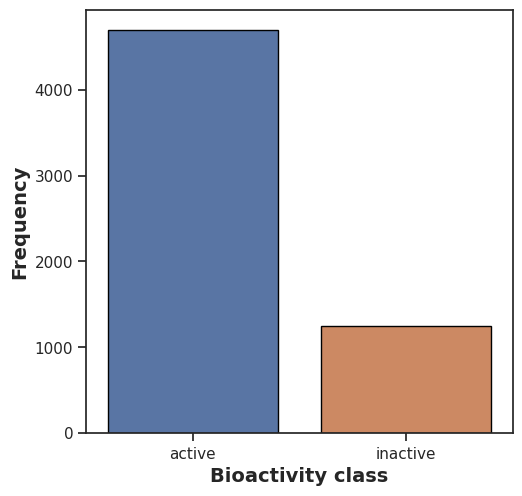

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


###**Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.



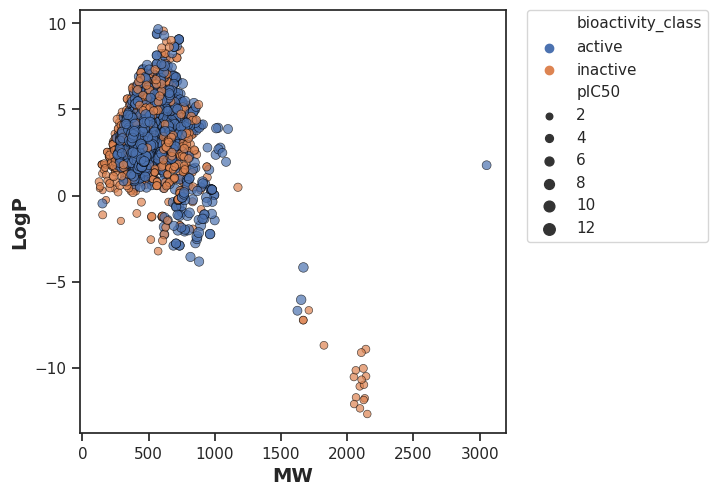

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

###**Box plots**

####**pIC50 value**

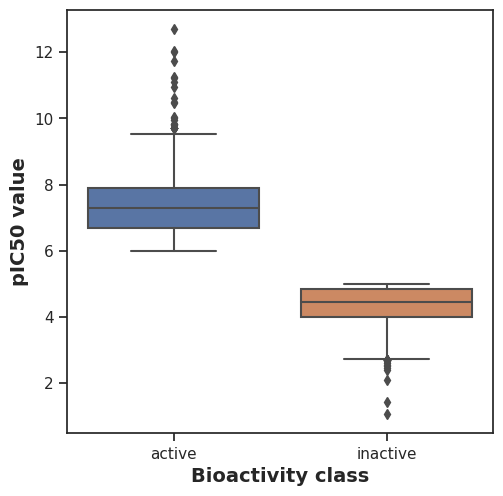

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')


**Statistical analysis | Mann-Whitney U Test**

In [27]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [28]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5874696.0,0.0,0.05,Different distribution (reject H0)


####**MW**

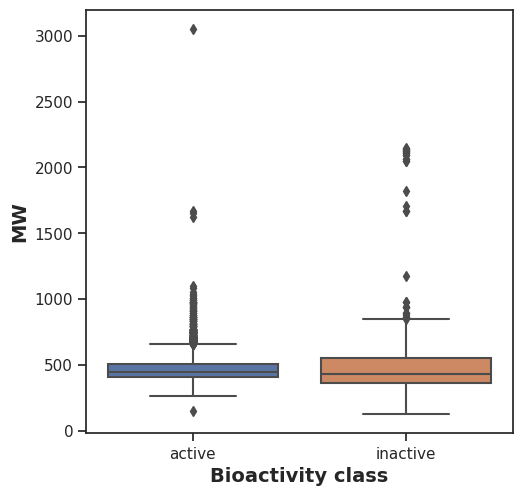

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [30]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3214102.5,2.917668e-07,0.05,Different distribution (reject H0)


####**LogP**

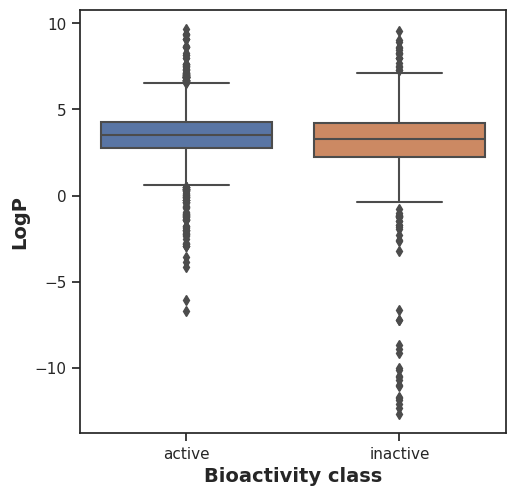

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [32]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3276929.0,3.114620e-10,0.05,Different distribution (reject H0)


####**NumHDonors**

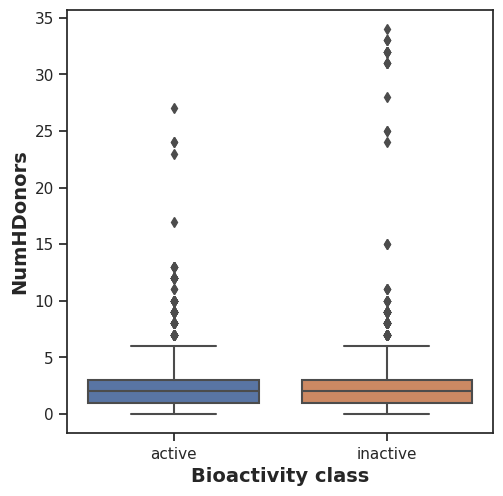

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [34]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2664129.0,1.148058e-07,0.05,Different distribution (reject H0)


####**NumHAcceptors**

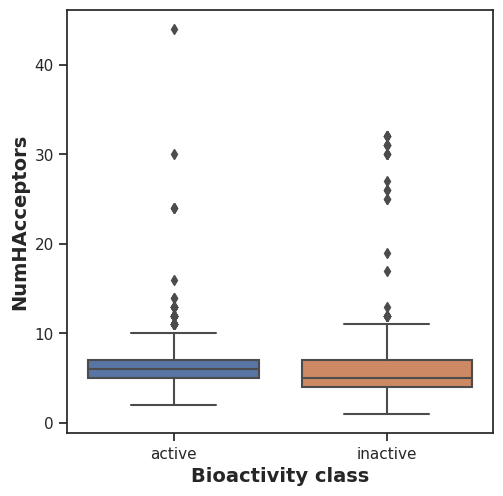

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [36]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3254990.5,2.032497e-09,0.05,Different distribution (reject H0)


###**Interpretation of Statistical Results**

####**Box Plots**

**pIC50 values**

Taking a look at **pIC50 values**, the actives and inactives displayed **statistically significant difference**, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.



**Lipinski's descriptors**

All of the Lipinski's descriptors (LogP, MW, LogP, NumHDonors and NumHAcceptors) exhibited **statistically significant difference** between actives and inactives.

##**Zip files**

In [37]:
! zip -r results.zip . -i *.csv *.pdf


  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 33%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: BACE_03_bioactivity_data_curated.csv (deflated 85%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)
  adding: plot_LogP.pdf (deflated 36%)
  adding: df_for_padelpy.csv (deflated 84%)
  adding: mannwhitneyu_LogP.csv (deflated 10%)
  adding: plot_ic50.pdf (deflated 37%)
